In [1]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt

In [3]:
PROCESSED_DIR = pathlib.Path("../data/processed/")
relevant_entries = ["Bad", "West", "Lene", "Stadion"]

In [10]:
example_df = pd.read_csv(PROCESSED_DIR / "Lene_202110222140_scanExport_3707.csv")
example_df = example_df.set_index("Date")

In [11]:
MAXIUMUS = {'Bad': {'mean': 563.8755760368664,
  'median': 582.0,
  'std': 165.02378673314143},
 'West': {'mean': 554.2690058479532,
  'median': 530.0,
  'std': 179.78650125554967},
 'Lene': {'mean': 457.8343949044586,
  'median': 428.0,
  'std': 136.65236856728163}}

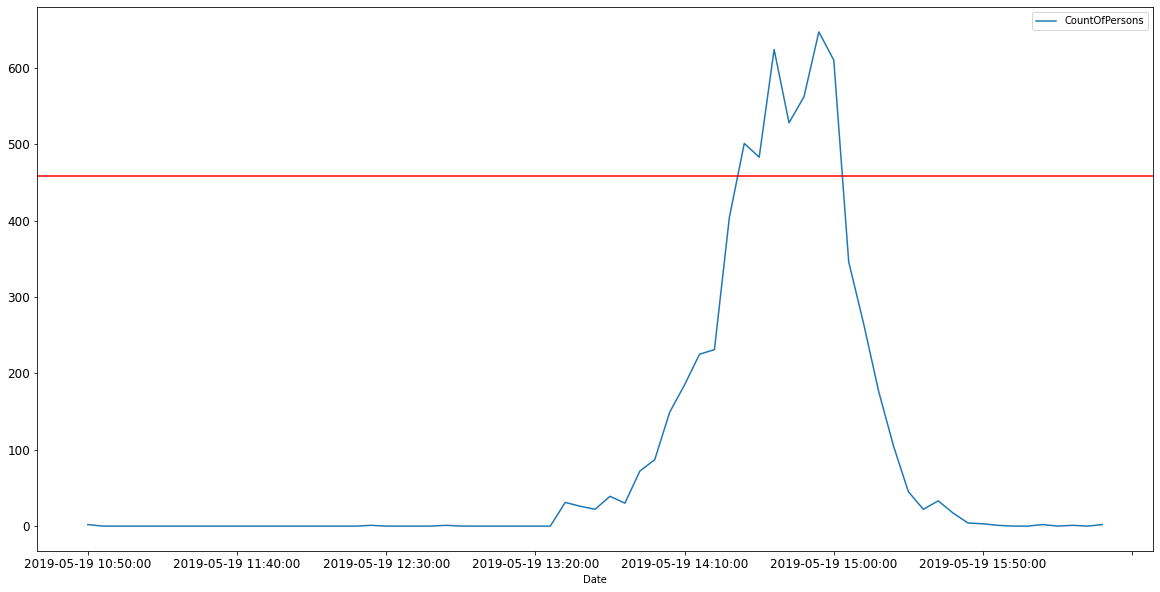

In [16]:
example_df.plot(figsize=(20,10),fontsize=12)
plt.axhline(y=MAXIUMUS["Lene"]["mean"],color="red")

In [50]:
example_df.to_json("example_plot_data.json")

In [19]:
maximum = MAXIUMUS["Lene"]["mean"]
example_df.query(f"CountOfPersons > {maximum}").apply(lambda x: x - maximum).sum()

CountOfPersons    750.159236
dtype: float64

In [25]:
dt = pd.to_datetime(example_df.query(f"CountOfPersons > {maximum}").index[-1]) - pd.to_datetime(example_df.query(f"CountOfPersons > {maximum}").index[0]) 

In [28]:
dt.total_seconds()

1800.0

In [29]:
def calculate_waiting_time(df:pd.DataFrame, maximum:float) -> float:
    dt = pd.to_datetime(df.query(f"CountOfPersons > {maximum}").index[-1]) - pd.to_datetime(df.query(f"CountOfPersons > {maximum}").index[0]) 
    dt_in_seconds = dt.total_seconds()
    return dt_in_seconds / 60

In [33]:
def calculate_waiting_persons(df: pd.DataFrame, maximum:float) -> int:
    waiting_persons = df.query(f"CountOfPersons > {maximum}").apply(lambda x: x - maximum).sum().values[0]
    return int(waiting_persons)

In [68]:
def calculate_remaining_persons(df: pd.DataFrame, maximum:float, time_stamp) -> int:
    peak_first_reached_time = df.query(f"CountOfPersons > {maximum}").index[0]
    if time_stamp < peak_first_reached_time:
        # if we are before the peak there are no waiting persons
        return 0
    peak_ends = df.query(f"CountOfPersons > {maximum}").index[-1]
    remaining_persons = df.query(f"'{peak_ends}'>= index >= '{time_stamp}'").apply(lambda x: x-maximum).sum().values[0]
    return remaining_persons

In [72]:
remaining_persons_df = pd.DataFrame()
for index in example_df.query(f"CountOfPersons > {maximum}")["CountOfPersons"].index:
    remaining_persons = int(calculate_remaining_persons(df=example_df,maximum=maximum,time_stamp=index))
    print(f"Time: {index} Waiting Persons: {remaining_persons}")

Time: 2019-05-19 14:30:00 Waiting Persons: 750
Time: 2019-05-19 14:35:00 Waiting Persons: 706
Time: 2019-05-19 14:40:00 Waiting Persons: 681
Time: 2019-05-19 14:45:00 Waiting Persons: 515
Time: 2019-05-19 14:50:00 Waiting Persons: 445
Time: 2019-05-19 14:55:00 Waiting Persons: 341
Time: 2019-05-19 15:00:00 Waiting Persons: 152
